# Exploring Blackfriday Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
df = pd.read_csv('train.csv')

## Dataset size and missing values

In [3]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
for column_name in df.columns:
    missing_value = df[column_name].isnull().sum()
    print(column_name, missing_value)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 173638
Product_Category_3 383247
Purchase 0


In [5]:
total_rows = len(df)
percent_missing_prod2 = df['Product_Category_2'].isnull().sum()/total_rows
percent_missing_prod3 = df['Product_Category_3'].isnull().sum()/total_rows

print('Total rows:{}\nProd2 Missing:{:.0%}\nProd3 Missing:{:.0%}'.format(total_rows, percent_missing_prod2, percent_missing_prod3))

Total rows:550068
Prod2 Missing:32%
Prod3 Missing:70%


In [6]:
unique_categories = []
for col_name in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    unique_categories += list(df[col_name].unique())
set(unique_categories)

{nan,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 nan}

In [7]:
import numpy as np
df['Product_Category_2'].fillna(np.mean(df['Product_Category_2']), inplace=True)
df['Product_Category_3'].fillna(np.mean(df['Product_Category_3']), inplace=True)

## Data types and representations

In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### User_ID and Product_ID

In [10]:
unique_users = len(df.User_ID.unique())
unique_products = len(df.Product_ID.unique())
print('There are {} unique users and {} unique products'.format(unique_users, unique_products))

There are 5891 unique users and 3631 unique products


### Gender, Age, Occupation, and City_Category

In [11]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category']:
    print(sorted(df[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']


### Stay_In_Current_City_Years

In [12]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### Marital_Status

In [13]:
df['Marital_Status'].unique()

array([0, 1])

## Data Distributions and visualization

In [14]:
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Product_Category_2 18
Product_Category_3 16
Purchase 18105


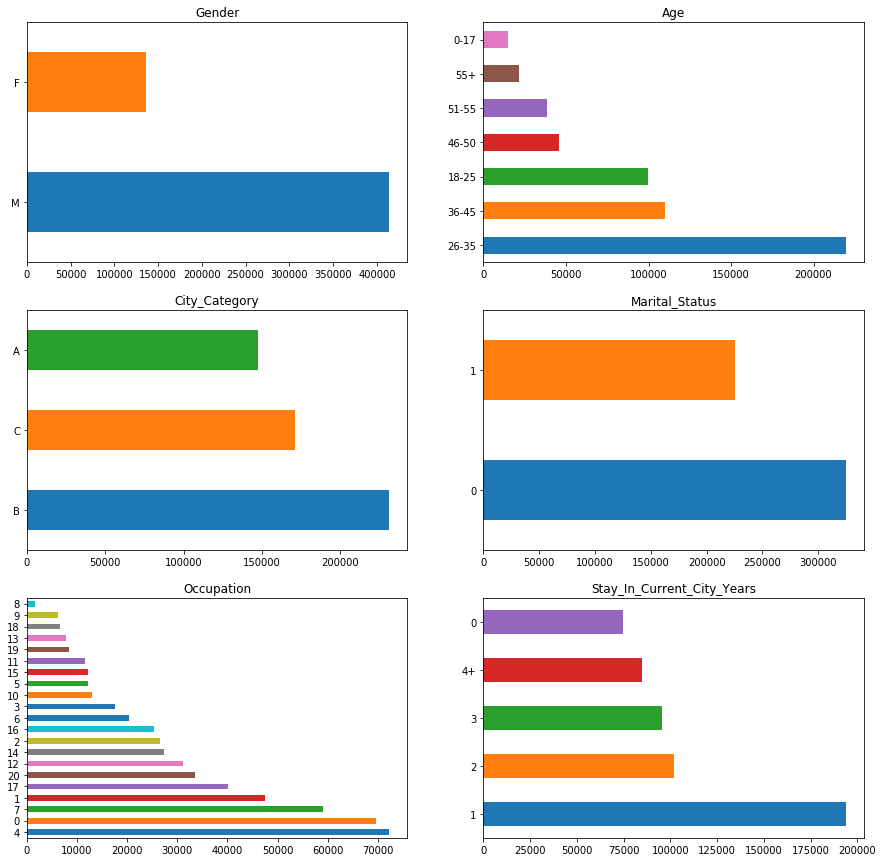

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

df['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
df['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
df['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
df['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
df['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
df['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

## Histograms

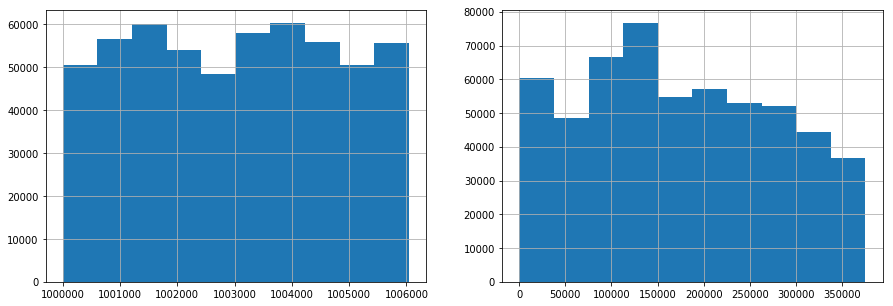

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15, 5])

df['User_ID'].hist(ax=axes[0])
df['Product_ID'].apply(lambda x:int(x[1:])).hist(ax=axes[1])

# Preprocessing 

In [20]:
# clean
df.User_ID = df.User_ID.astype(str)
df.Product_Category_2.fillna(np.mean(df['Product_Category_2']), inplace=True)
df.Product_Category_3.fillna(np.mean(df['Product_Category_3']), inplace=True)
df.Product_Category_1 = df.Product_Category_1.astype(int)
df.Product_Category_2 = df.Product_Category_2.astype(int)
df.Product_Category_3 = df.Product_Category_3.astype(int)
# shuffle
df = df.sample(frac=1).reset_index(drop=True)
# split train/eval
size = len(df)
eval_idx = int(size * 0.3)
# write to disk
df.iloc[eval_idx:].to_csv("training.csv", index=False)
df.iloc[:eval_idx].to_csv("testing.csv", index=False)
print(len(df.iloc[eval_idx:]), 'training records')
print(len(df.iloc[:eval_idx]), 'eval records')

385048 training records
165020 eval records
